In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv('/content/Diabetes_prediction.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0
...,...,...,...,...,...,...,...,...,...
995,1,103.496355,41.059401,24.930299,43.675978,25.846062,0.455884,19.905419,0
996,1,60.714150,64.082842,24.689064,111.562745,19.464280,0.250560,44.421874,1
997,0,97.597727,64.122312,22.140339,108.138552,22.733052,0.761463,58.949800,1
998,0,66.775137,55.908797,24.885274,219.521484,31.819187,0.382877,46.928923,0


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3.The dataset generated for diabetes prediction purposes contains a range of features associated with diabetes risk factors. These features may include variables such as blood sugar levels, body mass index (BMI), age, family history, and other relevant health indicators. Each set of feature values is accompanied by a diagnosis label that indicates whether the individual has diabetes or not. This dataset is valuable for training machine learning models to predict the likelihood of diabetes based on the provided risk factors. It can be used for research, analysis, and the development of predictive models aimed at improving diabetes diagnosis and managemen

In [34]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [35]:
df.shape

(1000, 9)

In [36]:
df.size

9000

DATA CLEANING

In [37]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Diagnosis,0


***EDA***

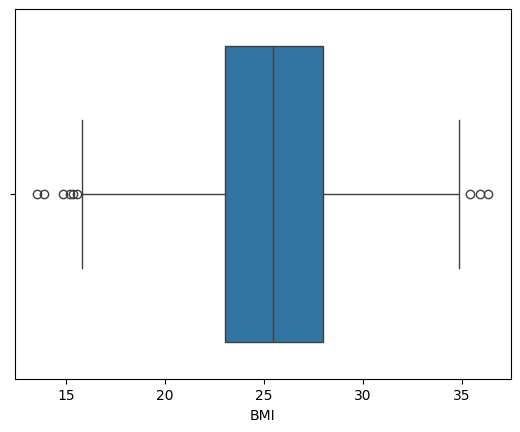

In [38]:
sns.boxplot(x=df['BMI'])
plt.show()

***MAP***

In [ ]:
df['Diagnosis'].unique()

array([0, 1])

<Axes: >

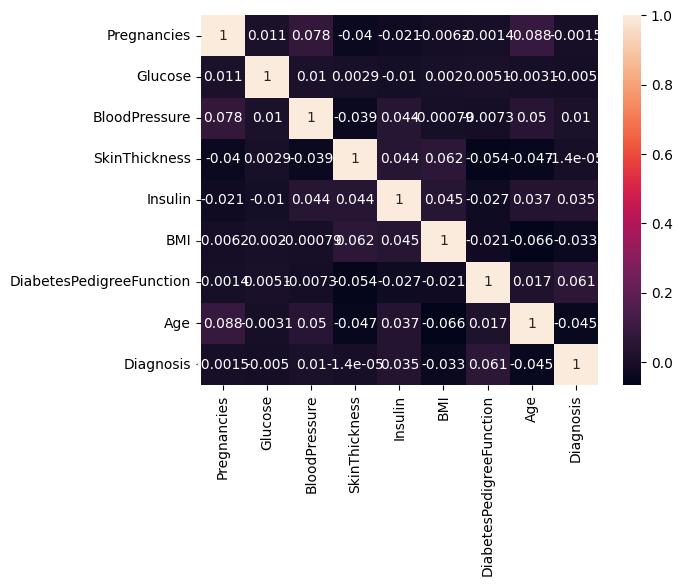

In [ ]:
sns.heatmap(df.corr(),annot=True)

*DATA WRANGLING*

In [ ]:
x=df.drop('Diagnosis',axis=1)
y=df['Diagnosis']

***TRAIN TEST SPLIT***

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

***MODELING***

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred_train=log_model.predict(x_train)
y_pred_test=log_model.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))


0.68625
0.725


In [47]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(log_model,x_train,y_train,cv=5).mean())


0.68625


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)


from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train Accuracy : 1.0
Test Accuracy : 0.68
Cross Validation Score: 0.5800000000000001


In [51]:
from sklearn.svm import SVC
model=SVC(C=0.1, kernel='linear')
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

0.68625
0.725
Cross Validation Score: 0.5800000000000001


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

y_pred_train=knn_model.predict(x_train)
y_pred_test=knn_model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,x_train,y_train,cv=5)
scores.mean()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_default,x,y,cv=5)
print("Cross Validation Score:",scores.mean())

0.73375
0.6
Cross Validation Score: 0.5800000000000001


In [ ]:
df = pd.DataFrame({'Algorithm':['Logistic Regresion','Decision Tree','Random Forest','Support Vector Classifier','est Neighbors'],
              'Train':[0.68,1.0,1.0,0.68,0.733],
              'Test':[0.725,0.55,0.68,0.725,0.6],
              'CV':[0.694,0.58,0.67,0.694,0.62]})
df

,Algorithm,Train,Test,CV
0,Logistic Regresion,0.680,0.725,0.694
1,Decision Tree,1.000,0.550,0.580
2,Random Forest,1.000,0.680,0.670
3,Support Vector Classifier,0.680,0.725,0.694
4,est Neighbors,0.733,0.600,0.620



Conclusion:

Based on these results, Logistic Regression and Support Vector Classifier (with a linear kernel) appear to be the most robust models, achieving the highest test accuracy (0.725) and cross-validation scores (0.694) among the evaluated algorithms.


In [26]:
from joblib import dump
dump(model,'Logistic Regression_model.joblib')

['Logistic Regression_model.joblib']